# Question 1 - single particle trajectory in magnetic field

The equation of motion of a particle with charge $q$ and mass $m$ in a general electromagnetic field (assuming no other forces) is $m \frac{d\vec{v}}{dt} = q(\vec{E} + \vec{v} \times \vec{B})$. 

1. Plot the trajectory of a deuterium ion with arbitrary initial velocity in a uniform magnetic field $\vec{B} = B \hat{z}$ with $B = 3\mathrm{T}$. Assume $\vec{E}=0$.

<div class="alert alert-block alert-info"><b>
Tip: </b> You may use the following function to update the particle position and velocity from some initial conditions:

In [1]:
import numpy as np
    
def particle_pusher(x_old, v_old, E, B, q, m, dt):
    """Particle pusher function

    x_old, v_old, E and B are 3-element numpy arrays,
    q and m are the particle charge and mass respectively,
    dt is the simulation timestep.
    All inputs are in SI units.
    
    """
    
    # Update position
    x_new = x_old + v*dt

    # Update velocity
    B_mag = np.linalg.norm(B)
    t = np.tan(q * B_mag * dt * 0.5 / m) * B / B_mag
    s = 2.0 * t / (1.0 + (np.linalg.norm(t) ** 2))
    v_minus = v_old + q * E * dt * 0.5 / m
    v_prime = v_minus + np.cross(v_minus,t)
    v_plus = v_minus + np.cross(v_prime,s)
    v_new = v_plus + q * E * dt * 0.5 / m

    return x_new, v_new

This is based on the Boris algorithm - see [here](https://www.particleincell.com/2011/vxb-rotation/) for more information. The input arguments `x_old`, `v_old`, `E` and `B` are expected to be 3-element numpy arrays. You may want to use this function off the shelf, or adapt it to use in a particle class which contains all relevant data and methods for a charged particle moving in an electromagnetic field (this is recommended!).
    
To visualise the trajectory, you may wish to use Matplotlib. First, run the cell magic `%matplotlib notebook` (or `%matplotlib widget` if working in VS code) to ensure output is rendered correctly in Jupyter. The following code will plot the particle trajectory, assuming `trajectory` is a numpy array of shape $[N_t,3]$, where $N_t$ is the number of timesteps simulated:

Text(0.5, 0, 'z')

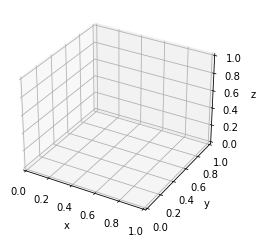

In [2]:
import matplotlib.pyplot as plt
from matplotlib import animation

# Create figure
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
    
# Plot the 3D trajectory of the particle
# ax.plot(trajectory[:,0],trajectory[:,1],trajectory[:,2])


2. Check that kinetic energy and magnetic moment of the particle are conserved.
3. Compare the deuterium ion trajectory to an electron orbiting in the same magnetic field. Calculate their Larmor radii. 


# Question 2 - drifts

<!-- 1. Using the code you wrote for the first question, now plot the trajectory of a deuterium ion in the presence of a uniform magnetic field $\vec{B} = B\hat{z}$ and electric field $\vec{E} = E\hat{y}$ (experiment with different values of $E$ and $B$). Plot also the guiding centre of the particle by rewriting the position as a function of time $t$ as  
    - $x(t) = x_{gc} + \frac{v_{\perp}}{\omega_c}\sin{(\omega_c t + \phi)}$
    - $y(t) = y_{gc} + \frac{v_{\perp}}{\omega_c}\sin{(\omega_c t + \phi)}$
    - $z(t) = z_0 + v_{\parallel}t$

  where $v_{\perp}$ and $v_{\parallel}$ are the perpendicular and parallel components of the particle velocity, $\omega_c$ is the cyclotron frequency and $\phi$ is the gyration phase. 
  
  The ExB drift velocity is $\vec{v}_d = \frac{\vec{E}\times \vec{B}}{B^2}$. Does this match your ion's guiding centre velocity in the x-direction?
  
2. For magnetic field gradients perpendicular to the field lines, the drift velocity is $\vec{v}_g = \frac{\frac{1}{2}mv_{\perp}^2}{q} \frac{\vec{B} \times \nabla B}{B^3}$ (with $\vec{B}$ evaluated at the guiding centre). Set up a non-uniform magnetic field of the form $\vec{B} = B(y)\hat{z}$, i.e. the field strength varies in the y-direction but always points in the z-direction. Compare the trajectory of your particle with the predicted guiding centre drift.  -->

1. Using the code you wrote for the first question, now plot the trajectory of a deuterium ion in the presence of a uniform magnetic field $\vec{B} = B\hat{z}$ and electric field $\vec{E} = E\hat{y}$ (experiment with different values of $E$ and $B$). Calculate the expected $\vec{E} \times \vec{B}$ drift velocity $\vec{v}_d$, and use this to plot the guiding centre alongside the particle trajectory you have computed (remembering $\vec{v}_{gc} = \vec{v}_{\parallel} + \vec{v}_d$). Does your ion's drift match speed and direction to that expected?

  <!-- where $v_{\perp}$ and $v_{\parallel}$ are the perpendicular and parallel components of the particle velocity, $\omega_c$ is the cyclotron frequency and $\phi$ is the gyration phase. 
  
  The ExB drift velocity is $\mathbf{v}_d = \frac{\mathbf{E}\times \mathbf{B}}{B^2}$. Does this match your ion's guiding centre velocity in the x-direction? -->
  
2. For magnetic field gradients perpendicular to the field lines, the drift velocity is $\vec{v}_g = \frac{\frac{1}{2}mv_{\perp}^2}{q} \frac{\vec{B} \times \nabla B}{B^3}$. Set up a non-uniform magnetic field of the form $\vec{B} = B(y)\hat{z}$, where $B(y) = B_0 + Cy$, with $C$ being some constant which defines the magnetic field gradient. Compare the trajectory of your particle with the predicted guiding centre drift. 

# Question 3 - magnetic mirror

The magnetic mirror is a device for confining plasma particles, which relies on $\nabla B$ parallel to $\vec{B}$. We will consider one half of such a device (for $z>0$), which contains a magnetic field pointing primarily along the z-axis, whose field strength varies in the z direction. We may also assume axisymmetry about the z-axis (i.e. $B_{\theta} = 0$ for the B-field written in cylindrical coordinates $(B_r,B_{\theta},B_z)$). 

![mirror](/Users/dpower/Desktop/mirror.png)

1. As shown in the lectures, an expression for $B_r$ can be obtained by writing $\nabla \cdot \vec{B} = 0$ in cylindrical coordinates. This depends on $\frac{\partial B_z}{\partial z}|_{r_0}$, which we can assume is constant along $z$. Write a function which returns all components of $\vec{B}$ for a given position, assuming $B_z$ increases from some $B_{min}$ at $z=0$. 

Hint: This may involve converting between cylindrical and Cartesian coordinates, depending on how you choose to implement this. When calculating an angle $\theta$ between a position on the (x,y) plane and the positive x-axis, you may wish to use the atan2 function, which is provided in numpy as `np.arctan2`

2. Setting $B_{min}=1\mathrm{T}$ and $\frac{\partial B_z}{\partial z}|_{r_0}=15\mathrm{Tm}^{-1}$, launch a test particle (deuterium ion) from the origin, orbiting about the z-axis, and see if you can observe the particle reverse direction in the z-axis. You may wish to use to following initial conditions
    - $\vec{v}_0 = 15\times 10^{4} (\hat{x} + \hat{y} + \hat{z})\mathrm{ms}^{-1}$ for the initial velocity
    - $\vec{r}_0 = (-0.003\hat{x} + 0.003\hat{y})\mathrm{m}$ for the initial position
    - $\vec{E} = 0$
    - timesteps of around 1 nanosecond

Hint: It may be easier to see the mirroring effect by plotting the particle trajectory in the x-z or y-z plane




# Question 4 (optional extension) - magnetic mirror continued

Now that you have hopefully observed the mirror effect in your computational particle, we will try to consider a slightly more realistic device. 

1. Write a new function which launches a particle into such a device. Now, we are not worried about storing the full trajectory - we should just track the particle until either a) the particle has passed some point $z_0$ on the z-axis (this may be the position of a magnetic coil of the device) or b) the particle's z-component of velocity has reversed direction. The function should return information on whether the particle escaped (condition a) or was trapped (condition b).
2. Let us imagine that the magnetic coils for this device are placed at $\pm z_0$. We will continue to consider only half of the device in the positive z domain, checking for particles which can escape past the coil placed at $z_{0}=1\mathrm{m}$ . Modify the B-field so that $\frac{\partial B_z}{\partial z}|_{r_0}=1\mathrm{Tm}^{-1}$ (keeping $B_{min}=1\mathrm{T}$). Now, vary the balance of perpendicular and parallel velocity in your particle's initial condition, keeping the magnitude $v_0$ the same, $v_0=2.5\times 10^5\mathrm{ms}^{-1}$. Launch a number of particles from the origin, and make a record of which ones are trapped and which ones escape (as well as their initial $v_{\perp,0}$ and $v_{\parallel,0}$).
3. Produce a plot of the particles in the $v_{\parallel,0},v_{\perp,0}$ plane, using their initial values, showing which ones are trapped and which ones escape. Estimate (by eye is sufficient) the cutoff value for $v_{\parallel,0}^2/v_{\perp,0}^2$ which determines whether a particle is trapped. Does this match the formula derived in the lectures, $v_{\parallel,0}^2/v_{\perp,0}^2 < (B_{z_0}/B_{min} - 1)$, where $B_{z_0}$ is the B-field strength at $z_0$?

Note: In part 3, only a single $v_0$ contour in the $v_{\parallel,0},v_{\perp,0}$ plane is explored, but you should be able to see the same behaviour for different values of $v_0$. If you want, you could try varying $v_0$ as well to confirm this. 